# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

<div class="alert alert-block alert-danger">
<b>Danger:</b> In order to be able to run this notebook successfully, you must have at minimun 32 Gb of RAM or you run the risk of crashing your computer. This notebook was created on a i7-11800H cpu, and 32GB RAM laptop.
</div>

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this. My project aims to help build a predictive model for heart disease. By being able to predict whether a patient has heart disease or not, this can be used in hospital to flag doctors to discuss way to manage this disease and prevent early death and potentially slow/mitigate the disease progression.

# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the GitHub but can be found where the data was taken underneath the data files section. The heart disease dataset was created from that 2020 survey and can be found in this repository's [data](https://github.com/xiaohua-su/Heart_Disease/tree/main/Data) folder.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we did not include in the heart disease dataset to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead had two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease respectively. Both questions, get at the issue of heart disease. It is important to note that while both heart attack and coronary artery disease are considered part of heart disease, they are not the only condition in this category. There are other conditions such as congenital heart issues, and rhythm issue that fall under heart disease that are not captured in this dataset.

# How to run the notebooks

The [environment.yml](./environment.yml) file is the environment that was used to run this notebook, [EDA notebook](Heart_Disease_EDA.ipynb) and the streamlit app. This notebook requires scipy version 1.5.3 in order to run. When you install the environment into your local, it is possible that scipy updates to a newer version due to streamlit/phik and will need to downgrade it in order for sklearn to operate properly. If you have a MAC unfortunately you'll need to figure out what MAC specific dependencies will be required.

# Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix
# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
#display all columns in dataframe
pd.set_option('display.max_columns', None)

## Inspection of Original Dataset

In [3]:
#load the data
df = pd.read_sas('./LLCP2020.XPT')

In [4]:
#Inspect the data
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN

In [5]:
#cleaning the columns names up for easier access
df.columns = [name.strip().lower() for name in df.columns]

After looking at the data, it is clear that the code book is required to figure out what each column represents. Not only that, but it will be benefical to rename these columns after cleaning and dropping some of them.

In [6]:
#verifying that this frequency matches with what's written in the code book
#looking at the years this survey was conducted
df.iyear.value_counts()

b'2020'    389826
b'2021'     12132
Name: iyear, dtype: int64

In [7]:
#heart attacks
df.cvdinfr4.value_counts(normalize= True)

2.0    0.940207
1.0    0.054626
7.0    0.004381
9.0    0.000786
Name: cvdinfr4, dtype: float64

In [8]:
df.cvdinfr4.isnull().sum()

6

In [9]:
#Coronary Heart Disease
df.cvdcrhd4.value_counts(normalize= True)

2.0    0.935572
1.0    0.056220
7.0    0.007369
9.0    0.000838
Name: cvdcrhd4, dtype: float64

1 = yes,  2 = no,  7 = Don't know/Not sure ,   9 = refused

We will look at the heart disease which is defined by the CDC as : stuff. As such, it is reasonable that we will combine heart attacks and coronary heart disease into a new column called heart disease after initial cleaning.

In [10]:
#creation of the heart_disease column
conditions = [
    (df.cvdcrhd4 == 1),
    (df.cvdinfr4 == 1)
]

values = [1,1]

df['heart_disease'] = np.select(conditions, values)

In [11]:
df.heart_disease.value_counts()

0    367795
1     34163
Name: heart_disease, dtype: int64

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
401953    False
401954    False
401955    False
401956    False
401957    False
Length: 401958, dtype: bool

***After looking at the code book.*** These will be are potential columns, I will want to keep as they can be/ are related to heart disease. Some are potentially environmental factors such as income. Some features while related to heart disease were a bit too fine grain for the business problem and or were not asked to the individual as it does not apply to them. As such, there 50% or more of missing or blanks and imputing would skew it highly: 

- _STATE : which state the individual is located

- GENHLTH : general health; Would you say that in general your health is

- PHYSHLTH : Number of Days Physical Health Not Good; Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 

- MENTHLTH : Number of Days Mental Health Not Good; Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 


- POORHLTH : Poor Physical or Mental Health; During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? 

- HLTHPLN1 :  Have any health care coverage

- PERSDOC2 : Multiple Health Care Professionals ; Do you have one person you think of as your personal doctor or health care - provider? (If ´No´ ask ´Is there more than one or is there no person who you think of as your personal doctor or health care provider?´.)

- MEDCOST : past 12 months, Could Not See Doctor Because of Cost

- CHECKUP1 : Length of time since last routine checkup

- EXERANY2 : : Exercise in Past 30 Days 

- SLEPTIM1 : How Much Time Do You Sleep 

- CVDSTRK3 : Ever Diagnosed with a Stroke

- ASTHMA3 : Ever Told Had Asthma 

- ASTHNOW  : Still Have Asthma 

- CHCSCNCR : (Ever told) you had skin cancer

- CHCOCNCR : (Ever told) you had any other types of cancer?

- CHCCOPD2 : (Ever told) (you had) chronic obstructive pulmonary disease, C.O.P.D., emphysema or chronic bronchitis?

- HAVARTH4 : Told Had Arthritis; (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia? (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion,tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)

-  ADDEPEV3 : (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?

- CHCKDNY2 : Ever told you have kidney disease?

- DIABETE4: (Ever told) you had diabetes; (Ever told) (you had) diabetes? (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.)

- EDUCA : Education Level

- RENTHOM1 : Own or Rent Home

- EMPLOY1 :  Employment Status

- INCOME2 : Income Level 

- WEIGHT2 : : Reported Weight in Pounds

- HEIGHT3 :  Reported Height in Feet and Inches 

- DIFFWALK : : Difficulty Walking or Climbing Stairs

- SMOKE100 : SMOKE100; Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 

- USENOW3 :  Use of Smokeless Tobacco Products; Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all? (Snus (Swedish for snuff) is a moist smokeless tobacco, usually sold in small pouches that are placed under the lip against the gum.)[Snus
(rhymes with ´goose´)]

- ALCDAY5 : Days in past 30 had alcoholic beverage 

- HIVRISK5 : Do Any High Risk Situations Apply

- ECIGARET : Ever used an e-cigarette?

- INCOME2 : Is your annual household income from all sources

All other columns will be droppped as they contained information that will either introduce biass into the models such as the`imrace` and `colgsex` which refer to race and gender respectively, or they are finer details about some the columns above where over half the respondents had were not asked as it did not pertain to them, nor did I think it would be helpful to the model. Further columns will be drop in the process if they contained too many nulls or if later on it is determined that it's too similar to another features. No cleaning was done on the original dataset as we still need to create our heart disease dataframe.

## Creation of Heart Disease Dataset

In [13]:
#Creating a heart_disease specific data frame
heart_df = df[['_state','genhlth', 'physhlth', 'menthlth', 'poorhlth', 'hlthpln1' , 'persdoc2' , 'medcost' , 'checkup1' ,
                  'exerany2' , 'sleptim1' , 'cvdstrk3' , 'asthma3' , 'chcscncr' , 'chcocncr' , 'chccopd2' , 'havarth4' ,
                  'addepev3' , 'chckdny2' , 'diabete4' , 'educa' , 'renthom1' , 'employ1' , 'income2' , 'weight2' ,
                  'height3' , 'diffwalk' , 'smoke100' , 'usenow3' , 'alcday5' , 'hivrisk5' , 'ecigaret' ,
              'cvdcrhd4', 'cvdinfr4' , 'heart_disease']]

In [14]:
heart_df

,_state,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,checkup1,exerany2,sleptim1,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd2,havarth4,addepev3,chckdny2,diabete4,educa,renthom1,employ1,income2,weight2,height3,diffwalk,smoke100,usenow3,alcday5,hivrisk5,ecigaret,cvdcrhd4,cvdinfr4,heart_disease
0,1.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,1.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,1.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,1.0,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


### Renaming our columns

Due to the nature of some of the column names, it is difficult to keep track of what some of these names represent. As such, they will be renamed into more interpretable name.

In [15]:
heart_df.rename(columns = { 'genhlth': 'general_health',
                           '_state' : 'state',
                           'physhlth': 'physical_health',
                           'menthlth': 'mental_health',
                           'poorhlth' : 'poor_health30',
                           'hlthpln1': 'health_insurance',
                           'persdoc2':'health_care_doctors',
                           'medcost':'no_doc_bc_cost',
                           'checkup1':'last_checkup',
                           'exerany2':'excercise_30',
                           'sleptim1':'sleep',
                           'cvdstrk3':'stroke',
                           'asthma3':'asthma',
                           'chcscncr':'skin_cancer',
                           'chcocncr':'other_cancer',
                           'chccopd2':'copd_type_issue',
                           'havarth4':'arthritis_anyform',
                           'addepev3':'depressive_disorder',
                           'chckdny2':'kidney_disease',
                           'diabete4':'diabetes',
                           'educa':'education_lvl',
                           'renthom1':'rent_own',
                           'employ1':'employment_status',
                           'income2':'income_level',
                           'weight2':'weight_kg',
                           'height3':'height_m',
                           'diffwalk':'difficulty_walking',
                           'smoke100':'smoke100_lifetime',
                           'usenow3':'smokeless_tobacco_products',
                           'alcday5':'alcohol_consumption_30',
                           'hivrisk5':'high_risk_situations',
                           'cvdcrhd4':'coronary_heart_disease',
                           'cvdinfr4':'heart_attack'
                          }, inplace = True)

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


general_health, health_insurance, health_care_doctors , no_doc_bc_cost ,last_checkup, excercise_30 , stroke , asthma , skin_cancer , other_cancer , copd_type_issue , arthritis_anyform, depressive_disorder , kidney_disease , diabetes , education_lvl, rent_own all have 7 and 9 for not sure and refused respectively. Others use a variation of that with 77 and 99 etc. These will be dealt with later on.

In [16]:
heart_df

,state,general_health,physical_health,mental_health,poor_health30,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,1.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,1.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,1.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,1.0,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


### Cleaning our target

Because our heart disease was created on the condition that someone responded yes to either they had a heart attack or has coronary heart disease, every row is filled in. When in reality there is some nulls in both the heart attack and coronary heart disease column.

In [17]:
heart_df.heart_attack.value_counts()

2.0    377918
1.0     21957
7.0      1761
9.0       316
Name: heart_attack, dtype: int64

In [18]:
heart_df.heart_attack.isna().sum()

6

In [19]:
#dropping the nulls
heart_df.dropna(subset= ['heart_attack', 'coronary_heart_disease'], inplace = True)

<ipython-input-19-99403d71dd45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df.dropna(subset= ['heart_attack', 'coronary_heart_disease'], inplace = True)


In [20]:
#verifying
heart_df.heart_attack.isna().sum()

0

In [21]:
#looking at what's left
heart_df.coronary_heart_disease.value_counts()

2.0    376056
1.0     22597
7.0      2962
9.0       337
Name: coronary_heart_disease, dtype: int64

In [22]:
heart_df.coronary_heart_disease.isna().sum()

0

Because these were used to create our target and is a bit more detailed. We willl be removing the individuals that refused to answer or were unsure as we want our target `heart_disease` to represent definitive responses since that is what I am trying to predict with my model.

In [23]:
#subsetting where they responded with either 1, 2
heart_df = heart_df[(heart_df['heart_attack'] != 7.0) & (heart_df['heart_attack'] != 9.0)]

In [24]:
heart_df.heart_attack.value_counts()

2.0    377918
1.0     21957
Name: heart_attack, dtype: int64

In [25]:
#subsetting where they responded with either 1, 2
heart_df = heart_df[(heart_df['coronary_heart_disease'] != 7.0) & (heart_df['coronary_heart_disease'] != 9.0)]

In [26]:
heart_df.coronary_heart_disease.value_counts()

2.0    374854
1.0     22293
Name: coronary_heart_disease, dtype: int64

In [27]:
heart_df

,state,general_health,physical_health,mental_health,poor_health30,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,1.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,1.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,1.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,1.0,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,72.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


In [28]:
heart_df.heart_disease.value_counts()

0    364224
1     32923
Name: heart_disease, dtype: int64

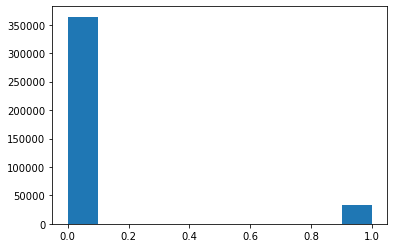

In [29]:
plt.hist(heart_df.heart_disease);

### Feature Cleaning

In [30]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397147 entries, 0 to 401957
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       397147 non-null  float64
 1   general_health              397142 non-null  float64
 2   physical_health             397145 non-null  float64
 3   mental_health               397145 non-null  float64
 4   poor_health30               198652 non-null  float64
 5   health_insurance            397147 non-null  float64
 6   health_care_doctors         397147 non-null  float64
 7   no_doc_bc_cost              397147 non-null  float64
 8   last_checkup                397145 non-null  float64
 9   excercise_30                397147 non-null  float64
 10  sleep                       397147 non-null  float64
 11  stroke                      397147 non-null  float64
 12  asthma                      397147 non-null  float64
 13  skin_cancer   

In [31]:
heart_df.general_health.value_counts()

2.0    137284
3.0    117842
1.0     81305
4.0     45040
5.0     14807
7.0       599
9.0       265
Name: general_health, dtype: int64

In [32]:
heart_df.poor_health30.value_counts()

88.0    110022
30.0     14776
2.0      10534
5.0       8454
1.0       7954
15.0      7175
3.0       6894
10.0      6743
7.0       4204
20.0      4145
77.0      3956
4.0       3845
14.0      2315
25.0      1464
6.0       1200
99.0      1000
8.0        992
12.0       639
21.0       511
28.0       328
9.0        227
18.0       192
16.0       178
29.0       135
17.0       124
27.0       115
13.0       111
22.0       106
11.0        89
26.0        77
24.0        67
23.0        44
19.0        36
Name: poor_health30, dtype: int64

In [33]:
heart_df.poor_health30.isna().sum()

198495

Close to half of the individuals were not asked this question or it's missing. Those that responded, majority fall into the none category. We will drop this column instead of imputing it as 'not applicable' since ~200k missing values is close to half of our dataset as such it can definitely skew our results. Not only that, but since these values are continous, it makes no sense to include a categorical value into this column.

In [34]:
heart_df.drop(columns= ['poor_health30'], inplace = True)

In [35]:
heart_df.head()

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,1.0,3.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,1.0,88.0,88.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0


In [36]:
heart_df.physical_health.value_counts()

88.0    276247
30.0     24310
2.0      17696
1.0      12401
3.0      10252
5.0       9065
77.0      6777
10.0      6595
15.0      6102
7.0       5624
4.0       5336
20.0      3914
14.0      3511
6.0       1508
99.0      1489
25.0      1416
8.0       1118
21.0       758
12.0       730
28.0       560
29.0       258
9.0        229
18.0       211
16.0       170
27.0       155
17.0       126
13.0       113
22.0       106
11.0       104
24.0        85
26.0        80
23.0        60
19.0        39
Name: physical_health, dtype: int64

In [37]:
heart_df.physical_health.isna().sum()

2

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


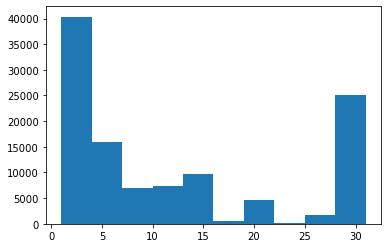

In [38]:
plt.hist(heart_df.physical_health, range = (1,31));

Alot of people stated none (88) for physhealth. Will need to recode 88 to 0 to ensure that if any scaling is done, we don't get insane pulling. Not only that but 0 makes sense as they've 0 days out of 30 days of bad physical health.

In [39]:
heart_df.mental_health.value_counts()

88.0    252839
30.0     21870
2.0      19425
5.0      16570
10.0     12513
3.0      12389
15.0     11882
1.0      11044
20.0      6469
7.0       6463
4.0       6285
77.0      5570
14.0      2453
25.0      2357
99.0      1985
6.0       1775
8.0       1297
12.0       897
28.0       631
21.0       426
29.0       389
18.0       249
9.0        246
16.0       189
27.0       164
17.0       155
13.0       134
22.0       113
11.0       106
24.0        87
23.0        75
26.0        74
19.0        24
Name: mental_health, dtype: int64

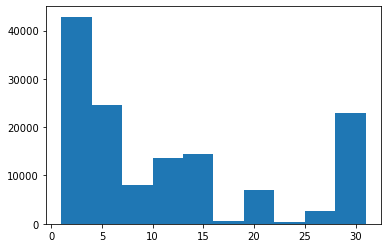

In [40]:
plt.hist(heart_df.mental_health, range = (1,31));

#### ecigaret

In [41]:
heart_df.ecigaret.value_counts()

2.0    210417
1.0     50348
9.0       395
7.0       229
Name: ecigaret, dtype: int64

In [42]:
heart_df.smoke100_lifetime.value_counts()

2.0    222336
1.0    154579
7.0      2108
9.0       556
Name: smoke100_lifetime, dtype: int64

In [43]:
#checking nulls
heart_df.ecigaret.isna().sum()

135758

In [44]:
135758/397147

0.3418331247623676

Ecigaret has all substantial amount of nulls (34%) that it might be worth dropping when I start to model.

In [45]:
heart_df[heart_df['ecigaret'].isnull()]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
1,1.0,3.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
7,1.0,4.0,15.0,10.0,1.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,7.0,5.0,150.0,503.0,2.0,1.0,3.0,NaN,NaN,NaN,2.0,2.0,0
34,1.0,2.0,5.0,88.0,1.0,1.0,2.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,8.0,240.0,601.0,2.0,1.0,3.0,210.0,NaN,NaN,2.0,2.0,0
36,1.0,3.0,7.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0,1.0,1.0,8.0,180.0,509.0,2.0,7.0,3.0,777.0,NaN,NaN,2.0,2.0,0
44,1.0,3.0,5.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,7.0,3.0,139.0,503.0,2.0,2.0,3.0,888.0,NaN,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,3.0,88.0,88.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,72.0,3.0,88.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,72.0,3.0,88.0,88.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,72.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


In [46]:
#checking to see if those that smoked were not asked this question
heart_df[(heart_df['smoke100_lifetime'] == 1.0) & (heart_df['ecigaret'].isnull())]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
7,1.0,4.0,15.0,10.0,1.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,7.0,5.0,150.0,503.0,2.0,1.0,3.0,NaN,NaN,NaN,2.0,2.0,0
34,1.0,2.0,5.0,88.0,1.0,1.0,2.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,8.0,240.0,601.0,2.0,1.0,3.0,210.0,NaN,NaN,2.0,2.0,0
48,1.0,2.0,88.0,10.0,1.0,1.0,2.0,1.0,2.0,8.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,5.0,8.0,140.0,506.0,2.0,1.0,3.0,203.0,NaN,NaN,2.0,2.0,0
171,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,7.0,7.0,230.0,601.0,2.0,1.0,1.0,203.0,NaN,NaN,2.0,2.0,0
194,1.0,4.0,30.0,88.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,7.0,4.0,165.0,511.0,1.0,1.0,3.0,888.0,NaN,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401941,72.0,4.0,30.0,30.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,3.0,99.0,180.0,503.0,1.0,1.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401944,72.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0,1.0,7.0,4.0,180.0,509.0,1.0,1.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401946,72.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,3.0,7.0,2.0,170.0,500.0,2.0,1.0,3.0,888.0,2.0,NaN,1.0,2.0,1
401951,72.0,4.0,7.0,88.0,1.0,1.0,2.0,1.0,2.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,7.0,77.0,175.0,507.0,1.0,1.0,3.0,201.0,2.0,NaN,2.0,1.0,1


In [47]:
#checking to see if those that said no to smoking were not asked it
heart_df[(heart_df['smoke100_lifetime'] == 2.0) & (heart_df['ecigaret'].isnull())]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
44,1.0,3.0,5.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,7.0,3.0,139.0,503.0,2.0,2.0,3.0,888.0,NaN,NaN,2.0,2.0,0
92,1.0,4.0,77.0,88.0,1.0,1.0,1.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,77.0,220.0,503.0,2.0,2.0,3.0,777.0,NaN,NaN,2.0,2.0,0
125,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,5.0,8.0,290.0,507.0,2.0,2.0,3.0,888.0,NaN,NaN,2.0,2.0,0
214,1.0,1.0,88.0,88.0,1.0,2.0,2.0,1.0,2.0,8.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,7.0,99.0,185.0,600.0,2.0,2.0,3.0,888.0,NaN,NaN,2.0,2.0,0
222,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,9.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,7.0,99.0,150.0,500.0,2.0,2.0,3.0,888.0,NaN,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401950,72.0,1.0,88.0,88.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,5.0,2.0,110.0,411.0,2.0,2.0,3.0,201.0,2.0,NaN,2.0,2.0,0
401953,72.0,3.0,88.0,88.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,72.0,3.0,88.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,72.0,3.0,88.0,88.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0


In [48]:
#addition of the observations of the two conditions
46479 + 70597

117076

In [49]:
heart_df[(heart_df['smoke100_lifetime'].isnull()) & (heart_df['ecigaret'].isnull())]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
1,1.0,3.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
72,1.0,4.0,30.0,88.0,1.0,2.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
116,1.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
157,1.0,5.0,30.0,88.0,1.0,2.0,2.0,1.0,2.0,7.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1
280,1.0,3.0,2.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401729,72.0,9.0,88.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
401764,72.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
401816,72.0,4.0,30.0,88.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
401915,72.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,1.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0


It's appears that the `ecigaret` is missing at random base on this. Potentially, it could be that the surveyor just automatically did not ask the individual if they said they don't smoke instead of coding it as a no which would make sense as to about why half of the `ecigaret` nulls are with the condition the person said no to smoking 100 cigarettes in their lifetime.

A decision about this column will be made after inspecting if it has any correlation with any other features.

#### Income

In [50]:
heart_df.income_level.isna().sum()

7256

In [51]:
heart_df.income_level.value_counts()

8.0     118304
7.0      52122
6.0      43440
99.0     41820
5.0      30962
77.0     29218
4.0      27313
3.0      20700
2.0      13404
1.0      12608
Name: income_level, dtype: int64

#### Alcohol

In [52]:
heart_df.alcohol_consumption_30.value_counts()

888.0    180723
201.0     27462
202.0     21047
101.0     16027
230.0     15558
102.0     12951
203.0     11915
205.0      9987
204.0      9946
103.0      9050
210.0      8004
220.0      6873
107.0      6786
215.0      6634
104.0      4431
105.0      4244
206.0      3659
777.0      3515
225.0      2989
208.0      2912
207.0      2612
999.0      2140
212.0      1737
106.0      1466
228.0       925
214.0       598
229.0       329
216.0       256
227.0       249
209.0       236
218.0       231
221.0       187
224.0       180
222.0       166
226.0       165
217.0       101
213.0        97
223.0        85
211.0        57
219.0        11
Name: alcohol_consumption_30, dtype: int64

The 1__ and 2__ mean two different things. Those that are using the format 1__ refers to how many days in a WEEK the individual drinks, while 2__ refers to how many days in a MONTH. As such, cleaning will be made in the coding of these values to be able to use this feature in our modeling.

In [53]:
heart_df.loc[heart_df['alcohol_consumption_30'] == 888.0, 'alcohol_consumption_30'] = 0
heart_df.loc[heart_df['alcohol_consumption_30'] == 777.0, 'alcohol_consumption_30'] = None
heart_df.loc[heart_df['alcohol_consumption_30'] == 999.0, 'alcohol_consumption_30'] = None

In [54]:
#coverting into the same unit of days in a MONTH
alcohol = []
for value in heart_df.alcohol_consumption_30:
    if value > 200:
        value = str(value).replace("2","", 1)
        alcohol.append(value)
    elif (value > 100) & (value < 200):
        value = str(value).replace("10","")
        value = round((float(value)*4.3))
        alcohol.append(value)
    else:
        alcohol.append(value)

In [55]:
heart_df.alcohol_consumption_30 = alcohol

In [56]:
heart_df.alcohol_consumption_30 = heart_df.alcohol_consumption_30.astype(float)

In [57]:
heart_df.alcohol_consumption_30.value_counts()

0.0     180723
1.0      27462
4.0      25973
30.0     22344
2.0      21047
9.0      13187
3.0      11915
5.0       9987
13.0      9147
10.0      8004
20.0      6873
15.0      6634
17.0      4532
22.0      4410
6.0       3659
25.0      2989
8.0       2912
7.0       2612
12.0      1737
26.0      1631
28.0       925
14.0       598
29.0       329
16.0       256
27.0       249
18.0       231
21.0       187
24.0       180
23.0        85
11.0        57
19.0        11
Name: alcohol_consumption_30, dtype: int64

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


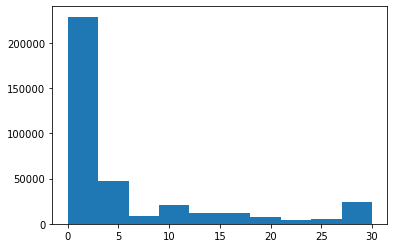

In [58]:
plt.hist(heart_df.alcohol_consumption_30);

#### weights

Values between 50 and 0776 are weights in lbs.  Weights that start with 9___ are weights in kilograms. 9999.0  = refused, 7777 = not sure. I will convert all the values into the same unit Kg to stay in line with scientific standards.

In [59]:
heart_df.weight_kg.value_counts()
#not helpful refer to codebook to get a better sense of distribution between those that reported in kg v lb

200.0     19510
180.0     18309
9999.0    17661
150.0     16463
160.0     16462
          ...  
498.0         1
985.0         1
403.0         1
9152.0        1
9113.0        1
Name: weight_kg, Length: 571, dtype: int64

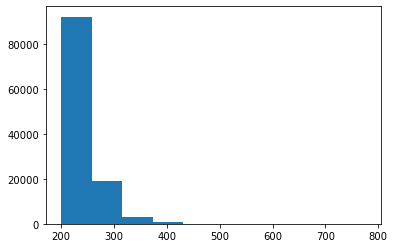

In [60]:
plt.hist(heart_df.weight_kg,range=(200, 776) );

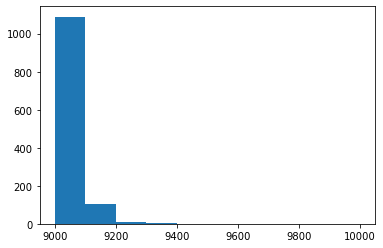

In [61]:
plt.hist(heart_df.weight_kg,range=(9000,9998) );

In [62]:
#weight conversions 
weight = []

for weights in heart_df['weight_kg']:
    if weights < 800: #conversion to kg
        weights = round(weights/2.2)
        weight.append(weights)
    elif (weights > 9000) & (weights < 9999):
        weights = str(weights).replace("9","",1)
        weight.append(weights)
    else:
        weight.append(weights)

In [63]:
weight

[48,
 77,
 7777.0,
 9999.0,
 57,
 82,
 68,
 68,
 77,
 74,
 61,
 74,
 64,
 136,
 118,
 67,
 98,
 75,
 68,
 77,
 59,
 74,
 84,
 9999.0,
 59,
 51,
 9999.0,
 72,
 61,
 73,
 68,
 77,
 77,
 109,
 66,
 82,
 91,
 75,
 86,
 128,
 47,
 100,
 114,
 63,
 54,
 82,
 64,
 64,
 84,
 9999.0,
 73,
 73,
 105,
 61,
 111,
 80,
 47,
 73,
 70,
 77,
 91,
 86,
 114,
 72,
 109,
 143,
 9999.0,
 102,
 89,
 89,
 52,
 nan,
 59,
 111,
 68,
 77,
 82,
 72,
 71,
 145,
 58,
 108,
 78,
 110,
 74,
 73,
 118,
 76,
 71,
 91,
 100,
 77,
 97,
 61,
 105,
 75,
 100,
 70,
 59,
 86,
 58,
 76,
 57,
 114,
 105,
 58,
 66,
 70,
 50,
 56,
 87,
 59,
 9999.0,
 53,
 nan,
 64,
 78,
 68,
 89,
 84,
 9999.0,
 175,
 66,
 132,
 77,
 98,
 73,
 73,
 95,
 77,
 100,
 82,
 122,
 109,
 105,
 67,
 82,
 55,
 86,
 112,
 59,
 75,
 48,
 118,
 75,
 84,
 84,
 66,
 81,
 109,
 82,
 136,
 93,
 7777.0,
 109,
 nan,
 67,
 64,
 74,
 148,
 64,
 77,
 96,
 80,
 85,
 91,
 108,
 120,
 84,
 105,
 65,
 64,
 77,
 102,
 68,
 105,
 65,
 82,
 84,
 52,
 106,
 92,
 59,
 89,
 

In [64]:
heart_df.weight_kg = weight

In [65]:
heart_df.weight_kg = heart_df.weight_kg.astype(float)

In [66]:
#verifying that changes were made, should only expect 9999 is a special code to be dealt with later
heart_df[heart_df.weight_kg > 9000]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
3,1.0,1.0,88.0,88.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
24,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,1.0,99.0,9999.0,500.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
27,1.0,3.0,88.0,88.0,1.0,2.0,2.0,1.0,1.0,7.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,1.0,7.0,99.0,9999.0,502.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
50,1.0,3.0,5.0,88.0,1.0,1.0,2.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0,7.0,4.0,9999.0,503.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
67,1.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,9999.0,506.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401092,72.0,4.0,88.0,30.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,9.0,99.0,9999.0,511.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
401613,72.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,9999.0,7777.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
401701,72.0,2.0,88.0,88.0,1.0,3.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,9999.0,9999.0,2.0,2.0,3.0,6.0,2.0,NaN,2.0,2.0,0
401826,72.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,9.0,9.0,99.0,9999.0,9999.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0


#### Height

values between 200-711 represent 0 _ / __ = feet / inches. 9__ - 9___ represent heights in meters/cm. 9999 is still refused and 7777 is not sure. I will convert these values into the units of meters to stay with the scientific standards.

In [67]:
heart_df.height_m.value_counts()

506.0     33417
504.0     32667
507.0     30139
505.0     29496
510.0     28328
          ...  
9134.0        1
9132.0        1
9209.0        1
9205.0        1
9139.0        1
Name: height_m, Length: 146, dtype: int64

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


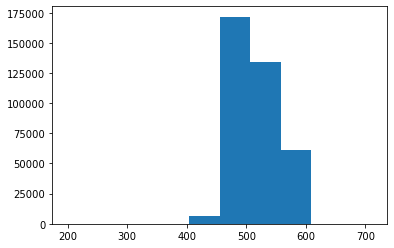

In [68]:
plt.hist(heart_df.height_m,range=(200,711) );

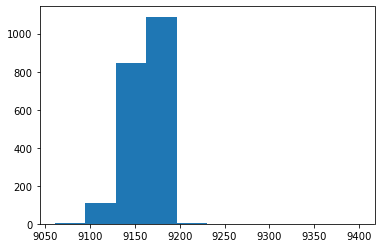

In [69]:
plt.hist(heart_df.height_m,range=(9061,9400) );

In [70]:
heart_df[(heart_df.height_m >= 200) & (heart_df.height_m <= 400)]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
476,1.0,4.0,5.0,20.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,3.0,8.0,2.0,64.0,400.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
5788,2.0,4.0,88.0,88.0,1.0,1.0,1.0,1.0,2.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,4.0,32.0,400.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
6344,2.0,4.0,88.0,15.0,2.0,7.0,7.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,7.0,77.0,59.0,400.0,1.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
10272,4.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,8.0,3.0,182.0,400.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
13449,4.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0,1.0,1.0,7.0,98.0,300.0,2.0,2.0,3.0,NaN,2.0,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395278,66.0,3.0,88.0,88.0,1.0,7.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,1.0,77.0,7777.0,400.0,2.0,2.0,3.0,0.0,7.0,1.0,2.0,2.0,0
395505,66.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,2.0,51.0,400.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
396320,66.0,4.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,1.0,87.0,400.0,2.0,1.0,3.0,0.0,2.0,1.0,2.0,2.0,0
398291,72.0,4.0,88.0,88.0,2.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,1.0,7777.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0


In [71]:
heart_df[(heart_df.height_m >= 9061)& (heart_df.height_m <= 9100)]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
13469,4.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,1.0,8.0,82.0,9090.0,2.0,1.0,3.0,9.0,2.0,NaN,2.0,2.0,0
17026,4.0,1.0,88.0,99.0,2.0,3.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,6.0,1.0,7777.0,9100.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
100971,18.0,5.0,30.0,88.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,2.0,7.0,1.0,190.0,9090.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
333249,48.0,4.0,20.0,30.0,2.0,7.0,1.0,1.0,1.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,1.0,4.0,91.0,9090.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,0
363179,51.0,3.0,88.0,15.0,2.0,3.0,1.0,3.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,59.0,9100.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0


In [72]:
heart_df.height_m

0          507.0
1          504.0
2          508.0
3         9999.0
4          506.0
           ...  
401953     411.0
401954     500.0
401955     401.0
401956     508.0
401957     507.0
Name: height_m, Length: 397147, dtype: float64

In [73]:
height_ = []
# values between 200-711 represent 0 _ / __ = feet / inches. 9__ - 9___ represent heights in meters/cm. 9999 is still refused and 7777 is not sure.
for heights in heart_df['height_m']:
    if (heights >= 200) & (heights <= 711):
        ft = float(str(heights)[0]) * 0.3048
        inch = float(str(heights)[1:3]) * 0.0254
        meters = round((ft + inch), ndigits=2)
        height_.append(meters*100)
    elif (heights > 9000) & (heights < 9999):
        meter = float(str(heights).replace("9","",1))
        height_.append(meter)
    else:
        height_.append(heights)

In [74]:
height_

[170.0,
 163.0,
 173.0,
 9999.0,
 168.0,
 175.0,
 168.0,
 160.0,
 180.0,
 160.0,
 168.0,
 152.0,
 155.0,
 183.0,
 185.0,
 152.0,
 185.0,
 163.0,
 152.0,
 163.0,
 150.0,
 180.0,
 168.0,
 152.0,
 180.0,
 155.0,
 157.0,
 157.0,
 152.0,
 168.0,
 163.0,
 163.0,
 150.0,
 185.0,
 163.0,
 175.0,
 157.0,
 170.0,
 168.0,
 168.0,
 157.0,
 160.0,
 185.0,
 160.0,
 163.0,
 173.0,
 170.0,
 168.0,
 173.0,
 160.0,
 170.0,
 155.0,
 185.0,
 173.0,
 183.0,
 178.0,
 152.0,
 163.0,
 163.0,
 157.0,
 183.0,
 163.0,
 188.0,
 173.0,
 183.0,
 175.0,
 168.0,
 185.0,
 180.0,
 175.0,
 157.0,
 nan,
 163.0,
 188.0,
 168.0,
 170.0,
 155.0,
 180.0,
 173.0,
 191.0,
 163.0,
 183.0,
 168.0,
 180.0,
 160.0,
 155.0,
 185.0,
 173.0,
 160.0,
 163.0,
 160.0,
 165.0,
 178.0,
 170.0,
 188.0,
 175.0,
 188.0,
 160.0,
 157.0,
 157.0,
 160.0,
 152.0,
 145.0,
 160.0,
 170.0,
 163.0,
 173.0,
 170.0,
 160.0,
 152.0,
 175.0,
 155.0,
 163.0,
 165.0,
 nan,
 160.0,
 178.0,
 170.0,
 178.0,
 183.0,
 157.0,
 173.0,
 165.0,
 170.0,
 170.0,
 18

In [75]:
heart_df.height_m = height_

In [76]:
#verifying that the height was cleaned correctly
heart_df.height_m.value_counts()

168.0    33480
163.0    32717
170.0    30308
165.0    29654
178.0    28376
         ...  
239.0        1
241.0        1
200.0        1
121.0        1
128.0        1
Name: height_m, Length: 116, dtype: int64

Looking at this, it seems that we have a range of people in terms of height, since we have individuals who are less than 4 ft tall. But also individuals who are extremely tall 7.8 ft tall (239).

### recoding 88, 77 and 8,7 and dropping any version of 9,99 etc

**Notes:** 

Most of the features have a 88.0 or some form of this to code for none instead of coding it as 0. As such we will now need to go into each column and recode it. I am recoding 88 to 0 to ensure that if any scaling is done, we don't get insane pulling. The 77 means they don't know/remember and 99 is they refused to answer the question. I will drop any rows where they responded with a refusal (9) as typically in a doctor's office, they won't mention it or dodge the question. The unsure (7) will be kept as this is also a response given.

In [77]:
heart_df.columns

Index(['state', 'general_health', 'physical_health', 'mental_health',
       'health_insurance', 'health_care_doctors', 'no_doc_bc_cost',
       'last_checkup', 'excercise_30', 'sleep', 'stroke', 'asthma',
       'skin_cancer', 'other_cancer', 'copd_type_issue', 'arthritis_anyform',
       'depressive_disorder', 'kidney_disease', 'diabetes', 'education_lvl',
       'rent_own', 'employment_status', 'income_level', 'weight_kg',
       'height_m', 'difficulty_walking', 'smoke100_lifetime',
       'smokeless_tobacco_products', 'alcohol_consumption_30',
       'high_risk_situations', 'ecigaret', 'coronary_heart_disease',
       'heart_attack', 'heart_disease'],
      dtype='object')

In [78]:
heart_df.income_level.value_counts()

8.0     118304
7.0      52122
6.0      43440
99.0     41820
5.0      30962
77.0     29218
4.0      27313
3.0      20700
2.0      13404
1.0      12608
Name: income_level, dtype: int64

#### Most continous/ monthly features

In [79]:
['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg',
 'height_m', 'alcohol_consumption_30']

['physical_health',
 'mental_health',
 'last_checkup',
 'excercise_30',
 'sleep',
 'weight_kg',
 'height_m',
 'alcohol_consumption_30']

In [80]:
# looking at the refused response in these features
heart_df[heart_df['alcohol_consumption_30'] == 99.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease


In [81]:
heart_df[heart_df['sleep'] == 99.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
209,1.0,4.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,99.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.0,1.0,7.0,99.0,9999.0,9999.0,2.0,1.0,9.0,NaN,NaN,NaN,2.0,2.0,0
974,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,99.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,4.0,4.0,64.0,152.0,1.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
1813,1.0,3.0,88.0,77.0,1.0,1.0,2.0,1.0,2.0,99.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,3.0,70.0,168.0,2.0,1.0,3.0,0.0,2.0,1.0,2.0,2.0,0
3703,1.0,2.0,77.0,88.0,1.0,1.0,2.0,1.0,2.0,99.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,9.0,8.0,178.0,188.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,0
4413,1.0,9.0,99.0,88.0,1.0,1.0,2.0,1.0,2.0,99.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,8.0,3.0,72.0,173.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397904,72.0,4.0,20.0,30.0,1.0,1.0,1.0,1.0,2.0,99.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,7.0,3.0,59.0,152.0,1.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
398821,72.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,99.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,3.0,64.0,183.0,2.0,1.0,3.0,0.0,1.0,NaN,2.0,2.0,0
398860,72.0,3.0,88.0,30.0,1.0,1.0,2.0,1.0,1.0,99.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,3.0,7.0,77.0,84.0,160.0,1.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
398997,72.0,4.0,7.0,88.0,1.0,1.0,2.0,4.0,1.0,99.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,4.0,2.0,100.0,173.0,1.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0


In [82]:
heart_df[heart_df['last_checkup'] == 99.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease


In [83]:
heart_df[heart_df['physical_health'] == 99.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
300,1.0,4.0,99.0,88.0,1.0,1.0,2.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0,7.0,4.0,98.0,170.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
317,1.0,5.0,99.0,30.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,2.0,8.0,1.0,55.0,157.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1
340,1.0,4.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,5.0,1.0,7.0,77.0,68.0,152.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
498,1.0,4.0,99.0,88.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,1.0,5.0,7.0,100.0,163.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,0
862,1.0,1.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,7.0,77.0,50.0,155.0,2.0,2.0,3.0,0.0,7.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395848,66.0,3.0,99.0,99.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,3.0,109.0,155.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,0
396002,66.0,3.0,99.0,88.0,1.0,3.0,2.0,4.0,2.0,77.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0,9.0,77.0,7777.0,178.0,2.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0,0
396036,66.0,1.0,99.0,88.0,1.0,2.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,1.0,5.0,95.0,183.0,2.0,2.0,3.0,0.0,2.0,1.0,2.0,2.0,0
396107,66.0,1.0,99.0,88.0,2.0,1.0,2.0,3.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,6.0,1.0,9.0,8.0,7777.0,173.0,2.0,2.0,3.0,NaN,9.0,NaN,2.0,2.0,0


In [84]:
heart_df[heart_df['mental_health'] == 99.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
340,1.0,4.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,5.0,1.0,7.0,77.0,68.0,152.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
755,1.0,3.0,77.0,99.0,1.0,1.0,9.0,1.0,1.0,10.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,4.0,2.0,7.0,99.0,105.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
862,1.0,1.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,7.0,77.0,50.0,155.0,2.0,2.0,3.0,0.0,7.0,2.0,2.0,2.0,0
863,1.0,5.0,11.0,99.0,1.0,3.0,2.0,3.0,2.0,77.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,7.0,2.0,69.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
948,1.0,4.0,15.0,99.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,4.0,9.0,7.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397692,72.0,4.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,8.0,2.0,77.0,170.0,1.0,1.0,3.0,1.0,2.0,NaN,2.0,2.0,0
397734,72.0,3.0,88.0,99.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,4.0,6.0,77.0,175.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
397937,72.0,2.0,88.0,99.0,1.0,1.0,2.0,1.0,1.0,10.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,5.0,2.0,1.0,77.0,75.0,168.0,1.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
399303,72.0,3.0,88.0,99.0,1.0,1.0,2.0,1.0,2.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,1.0,7.0,7.0,98.0,180.0,2.0,1.0,3.0,0.0,2.0,NaN,2.0,2.0,0


In [85]:
heart_df.shape

(397147, 34)

In [86]:
#recoding using all features that contain 88.0, 77.0 in those that have continuous value.
# In continuous is all day goes up to 30 days, except weight and height.
def recoding(dataframe):
    for x in dataframe.columns:
        dataframe.loc[dataframe[f'{x}'] == 88.0, f'{x}'] = 0
        dataframe.loc[dataframe[f'{x}'] == 77.0, f'{x}'] = None
        dataframe.drop(list(dataframe[dataframe[f'{x}'] == 9.0][f'{x}'].index), inplace = True)

In [87]:
recoding(heart_df)

In [88]:
#verifying
heart_df.shape

(346313, 34)

In [89]:
heart_df.head()

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,2.0,2.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,173.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0.0
4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0.0


#### employment status

`employment_status` would only change the 9.0 to be none, 7 actually means something here.

In [90]:
heart_df.drop(list(heart_df[heart_df['employment_status'] == 9.0]['employment_status'].index), inplace= True)

In [91]:
#verifying
heart_df[heart_df.employment_status == 9.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease


##### Categorical / Yes or No features

general_health, health_insurance, health_care_doctors , no_doc_bc_cost ,last_checkup, excercise_30 , stroke , asthma , skin_cancer , other_cancer , copd_type_issue , arthritis_anyform, depressive_disorder , kidney_disease , diabetes , education_lvl, rent_own all have 7 and 9 for not sure and refused respectively and also need to be dealt with like the continuous feature.

In [92]:
heart_df.shape

(346313, 34)

In [93]:
# For our categorical columns, yes/no questions uses 7, 9
columns = ['general_health', 'health_insurance', 'health_care_doctors' , 'no_doc_bc_cost' ,'last_checkup',
           'excercise_30', 'stroke' , 'asthma' , 'skin_cancer' , 'other_cancer' , 'copd_type_issue' , 'arthritis_anyform',
           'depressive_disorder' , 'kidney_disease' , 'diabetes' , 'education_lvl', 'rent_own', 'ecigaret',
          'smokeless_tobacco_products', 'high_risk_situations', 'difficulty_walking']

for x in heart_df.columns:
    if x in columns:
        heart_df.loc[heart_df[f'{x}'] == 7.0, f'{x}'] = None
        heart_df.drop(list(heart_df[heart_df[f'{x}'] == 9.0][f'{x}'].index), inplace= True)

In [94]:
heart_df.shape

(346313, 34)

In [95]:
#verifying that it worked
heart_df.health_insurance.value_counts()

1.0    315877
2.0     29509
Name: health_insurance, dtype: int64

In [96]:
heart_df.shape

(346313, 34)

#### weight and height

In [97]:
heart_df.shape

(346313, 34)

In [98]:
#dealing with the weight and height ones
columns_1000s = ['weight_kg', 'height_m']

for x in heart_df.columns:
    if x in columns_1000s:
        heart_df.drop(list(heart_df[heart_df[f'{x}'] == 9999.0][f'{x}'].index), inplace= True)
        heart_df.loc[heart_df[f'{x}'] == 7777.0, f'{x}'] = None

In [99]:
heart_df.shape

(331528, 34)

In [100]:
#verifying weight
heart_df[heart_df.weight_kg == 9999.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease


In [101]:
#verifying height
heart_df[heart_df.height_m == 9999.0]

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease


# Data Exploration

In [102]:
#dropping the two columns used to create our target from df
heart_df.drop(columns = ['coronary_heart_disease', 'heart_attack'], inplace = True)

In [103]:
heart_df.head(5)

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
5,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0


### Phi_k

My dataset is a mixture of both categorical and continuous features, I would like to see the correlation between them. I am using this a recently made library called phik that is able to determine correlations with categorical features without having to OHE these features out. Not only that, but it's capable of doing correlation between categorical and continuous features, and can pick up on non-linear correlations between features.

More information on this library can be found and comparsion:

[phi_k](https://phik.readthedocs.io/en/latest/introduction.html)

[phi_k tutorial's notebook](https://github.com/KaveIO/PhiK/tree/master/phik/notebooks)

[Getting Familar with phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution)

In [104]:
data_types = {'general_health': 'categorical',
              'state' : 'categorical',
             'health_insurance':'categorical',
             'health_care_doctors':'categorical',
             'no_doc_bc_cost':'categorical',
             'stroke':'categorical',
             'asthma':'categorical',
             'skin_cancer':'categorical',
             'other_cancer':'categorical',
             'copd_type_issue':'categorical',
             'arthritis_anyform':'categorical',
             'depressive_disorder':'categorical',
             'kidney_disease':'categorical',
             'diabetes':'categorical',
             'education_lvl':'categorical',
             'rent_own':'categorical',
             'employment_status':'categorical',
             'income_level':'categorical',
             'difficulty_walking':'categorical',
             'smoke100_lifetime':'categorical',
             'smokeless_tobacco_products':'categorical',
             'high_risk_situations':'categorical',
             'ecigaret':'categorical',
             'heart_disease':'categorical'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in data.columns]
interval_cols

[]

In [105]:
phik_overview = heart_df.phik_matrix(interval_cols = interval_cols)
phik_overview.round(2)

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
state,1.00,0.15,0.09,0.09,0.15,0.22,0.09,0.12,0.14,0.09,0.06,0.05,0.10,0.05,0.10,0.12,0.09,0.05,0.12,0.18,0.22,0.19,0.23,0.13,0.11,0.12,0.17,0.13,0.17,0.05,0.09,0.08
general_health,0.15,1.00,0.58,0.29,0.04,0.10,0.12,0.14,0.24,0.26,0.15,0.12,0.04,0.12,0.25,0.24,0.18,0.16,0.20,0.19,0.10,0.32,0.29,0.23,0.11,0.38,0.16,0.01,0.23,0.01,0.04,0.21
physical_health,0.09,0.58,1.00,0.45,0.03,0.14,0.17,0.09,0.27,0.20,0.17,0.17,0.05,0.14,0.29,0.32,0.28,0.17,0.19,0.14,0.11,0.33,0.22,0.18,0.09,0.51,0.17,0.02,0.11,0.05,0.08,0.21
mental_health,0.09,0.29,0.45,1.00,0.05,0.07,0.23,0.06,0.14,0.21,0.06,0.15,0.05,0.04,0.13,0.10,0.52,0.05,0.06,0.12,0.24,0.26,0.18,0.14,0.10,0.19,0.14,0.04,0.10,0.15,0.24,0.06
health_insurance,0.15,0.04,0.03,0.05,1.00,0.18,0.39,0.21,0.08,0.07,0.04,0.02,0.11,0.10,0.04,0.15,0.00,0.04,0.07,0.28,0.11,0.28,0.18,0.04,0.11,0.05,0.02,0.02,0.05,0.09,0.16,0.06
health_care_doctors,0.22,0.10,0.14,0.07,0.18,1.00,0.08,0.40,0.01,0.08,0.04,0.02,0.06,0.06,0.04,0.11,0.03,0.04,0.09,0.18,0.40,0.24,0.15,0.09,0.18,0.07,0.04,0.13,0.07,0.05,0.09,0.06
no_doc_bc_cost,0.09,0.12,0.17,0.23,0.39,0.08,1.00,0.12,0.08,0.17,0.03,0.10,0.06,0.03,0.08,0.02,0.22,0.02,0.03,0.14,0.09,0.22,0.18,0.04,0.05,0.11,0.04,0.01,0.04,0.12,0.20,0.01
last_checkup,0.12,0.14,0.09,0.06,0.21,0.40,0.12,1.00,0.04,0.06,0.05,0.02,0.07,0.08,0.06,0.13,0.03,0.05,0.11,0.06,0.11,0.18,0.06,0.08,0.13,0.09,0.05,0.06,0.10,0.05,0.11,0.08
excercise_30,0.14,0.24,0.27,0.14,0.08,0.01,0.08,0.04,1.00,0.20,0.12,0.07,0.00,0.08,0.22,0.21,0.13,0.13,0.21,0.30,0.04,0.26,0.23,0.13,0.12,0.42,0.06,0.01,0.21,0.03,0.01,0.15
sleep,0.09,0.26,0.20,0.21,0.07,0.08,0.17,0.06,0.20,1.00,0.11,0.11,0.05,0.05,0.15,0.13,0.20,0.09,0.11,0.19,0.17,0.26,0.19,0.53,0.13,0.25,0.15,0.06,0.10,0.07,0.13,0.11


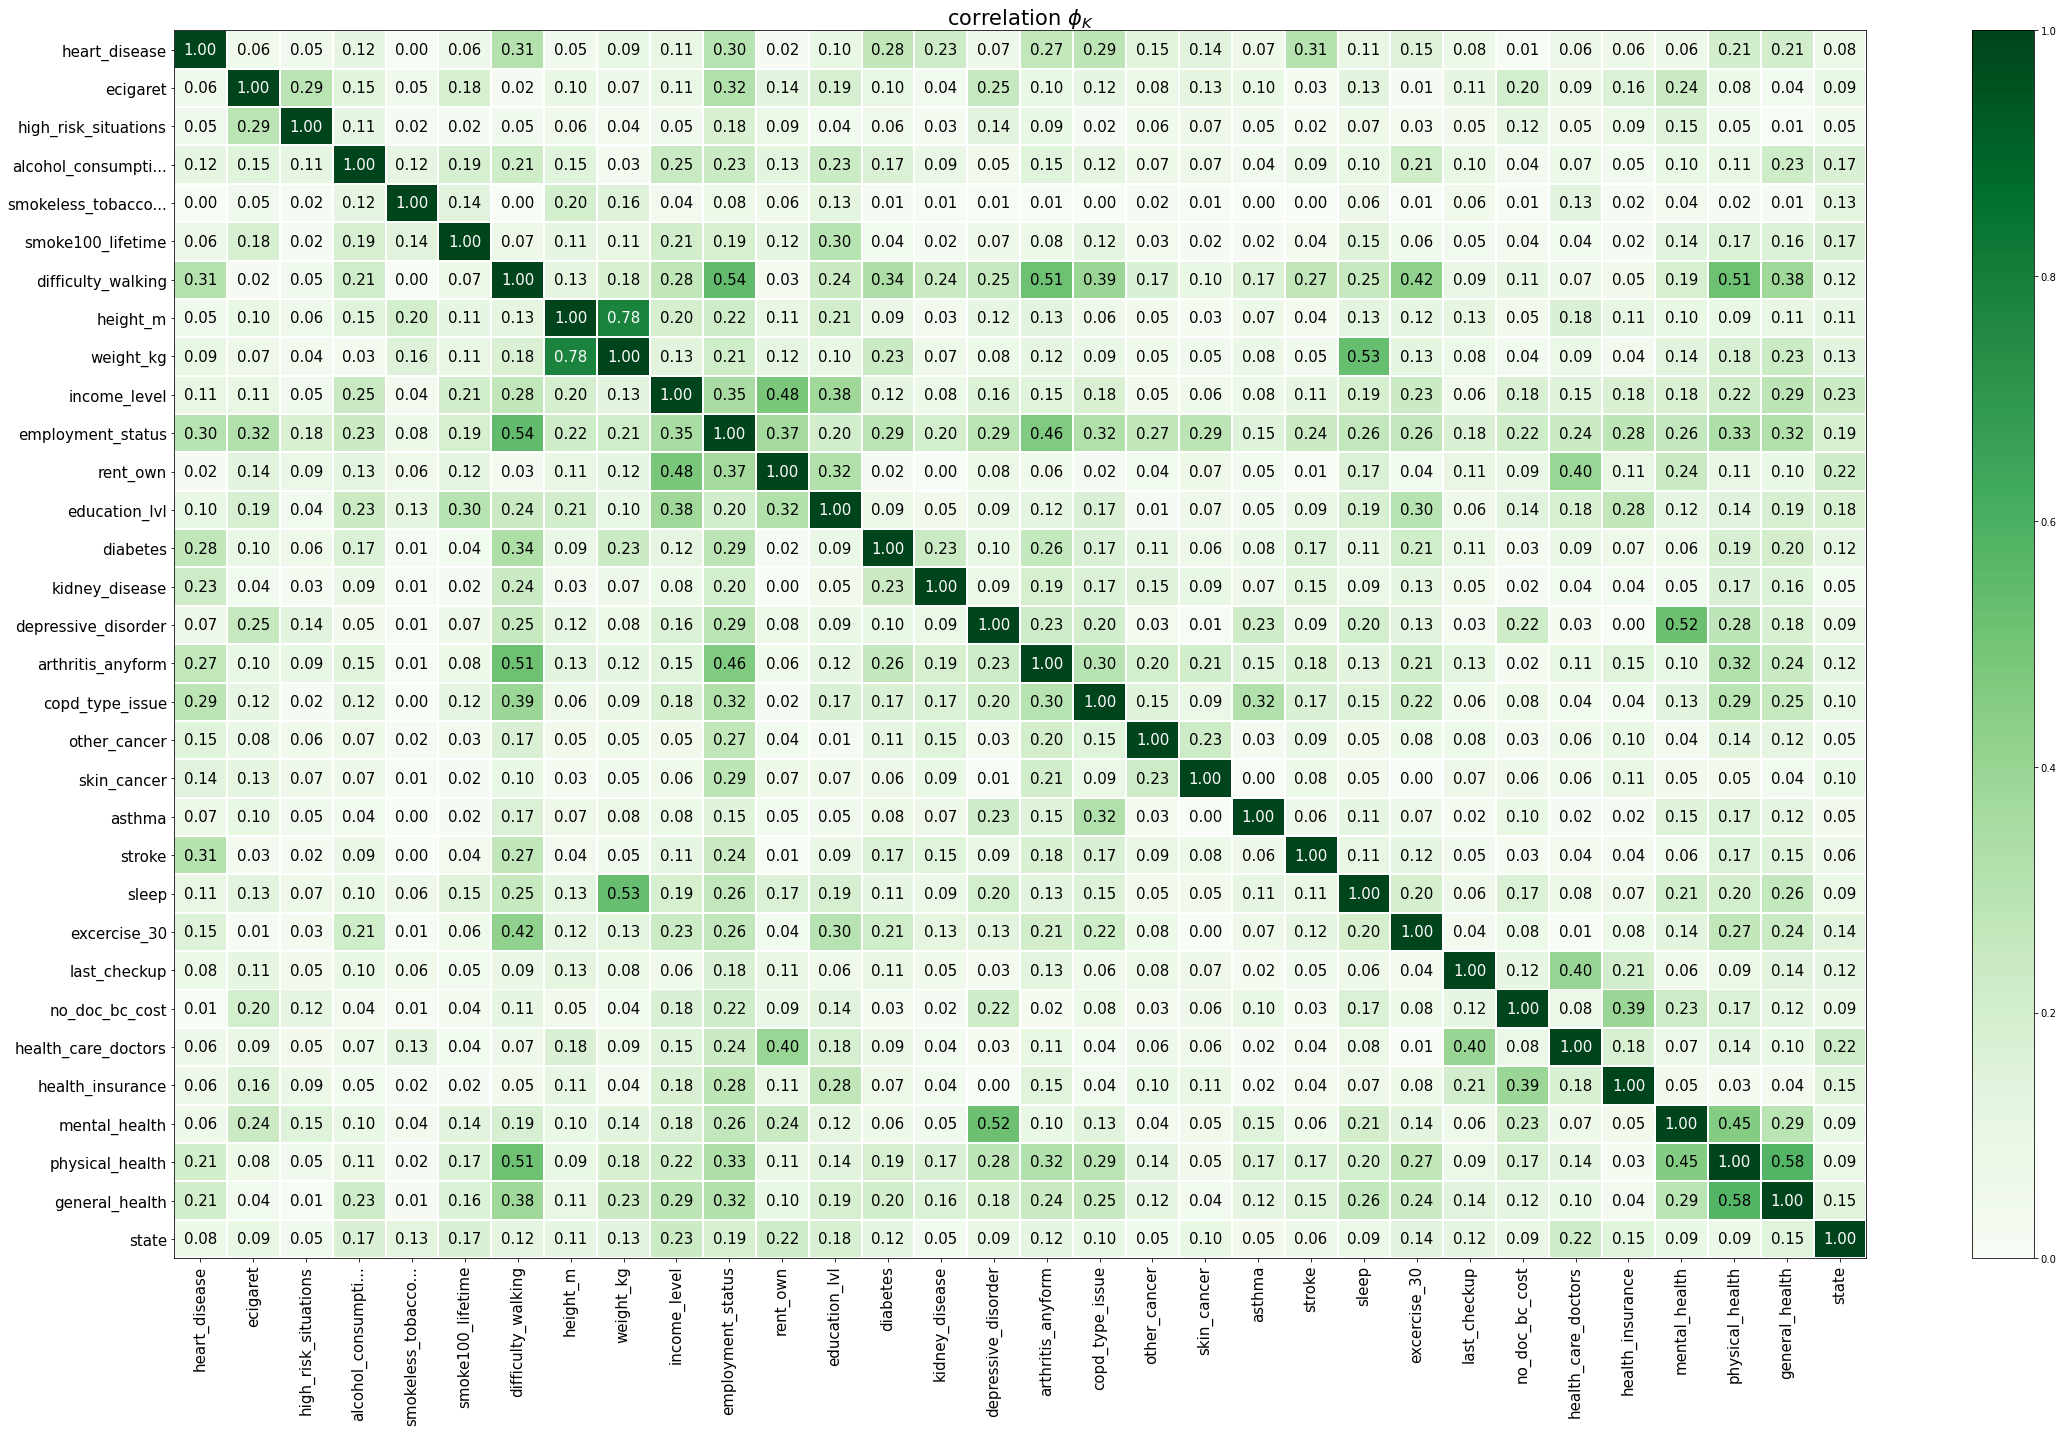

In [106]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(32, 20))
plt.tight_layout()

The highest correlation is 0.79 which is between weight and height which makes sense. Everything is about 0.58 or less which means no strong correlation between features as such this dataset doesn't have as much multicolinearity but it still exists. I will consider all the features that have more than a 0.10 correlation with our target and potentially 1-2 more other columns that may be asked in a patient history form for modeling.

In [107]:
# for categorical values but only works on one column to one column and not a df

# def cramers_v(x,y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [108]:
test = heart_df.dropna()
test.heart_disease.value_counts(normalize= True)

0.0    0.912691
1.0    0.087309
Name: heart_disease, dtype: float64

In [109]:
test.shape

(172148, 32)

#### Discussion of Missing Values

The columns chosen on for this `heart_df` all have missing values. I did not include any columns that were sub-questions to one of these questions. For instance for the diabetes question, if the respondent responded to only having diabetes while pregnant, there is a note to ask the individual another follow-up question that is also coded in the original dataset. As such, most of the values are assumed to be missing completely at random. Not only that, but the missing represents in the code book are the blanks which means that the individual either did not respond to the question or they were just not asked that question by the surveyor for some reason.

## Data Saving

Due to how long this notebook is, I will save our `heart_df`. Since our `heart_df` does not contain as many columns and fewer rows, it can potentially be of a much smaller size that can be uploaded to GitHub with the rest of our work as well.

In [110]:
#saving all these variables in separate files
heart_df.to_csv('./Data/heart_df.csv', index = False)

In [111]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
5,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
401954,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
401955,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
401956,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


# App

 Our best model was deployed in an app. The function development in the [app.py](./app.py) file can be found in the app development notebook. In addition, the code used to make the app on streamlit can be found in the app.py. Unfortunately, due to how big the model file is (2-4 Gb), I was unable to implement my model on the streamlit website, but managed to run it locally. As such, it is not available for others to use. In my GitHub, I have provided the streamlit environment in which I created it. This app can be run locally with the streamlit environment along with running the modeling notebook in order to get the model file into your local computer.

# Next Steps

The next step for this project would be to further refine our target. This projects only looks at heart attack and Coronary Artery Disease. These two conditions are some conditions that fall under the heart disease. Heart disease encompasses other conditions such as high blood pressure, congenital heart disease etc., it's not just CAD and heart attacks as such we would have to refine the questions being asked individual.

Not only that but more time to refine our model. Due to computational limitation of my system and the computational time, I am not able to perform as much grid-searches to fine-tune the model even further. Not only that but we can refine our model on data from patients' information form and the diagnoses given by the doctor to help improve the flagging of individuals with such a condition that way their primary doctor know to discuss this with the patient.

Build a better app. The app created was for demonstrated purposes but can be made so that instead of having to fill in the information manually, it can capture the information from a picture of the history form from a patient.

# Conclusion

In conclusion, my model is able to predict whether someone has heart disease or not. Further refinement can by including from the patient's health form to see if that helps with identifying these individuals better. Not only that, but expanding what falls under heart disease as this project really only looks at coronary heart disease and heart attacks, when in reality there's other condition that fall under this umbrella. Finally, a better app can be made that is able to capture information from the patient history information paperwork as such nurse/health care receptionist does not need to manually fill this information on.

This model can be deployed in an app to be used in a hospital to flag a doctor on an individual. By being able to flag an individual as having heart disease, the doctor can start potentially asking other questions to the individual and do further test to confirm. But what is key, here is that a conversation with the doctor can begin and early intervention can occur. By talking about the heart health and ways to manage such a disease and other prevention, even if it's a misdiagnosis, the individual is now aware of this and can if they choose so start taking either preventative measures or start managing this disease. This is in hopes that we can keep the individual healthy and prevent early death due to this disease. Not only that, but some heart disease can be prevented by changing habits and behaviors. Thus, my model will identify these individual for the doctor when they fill out their health form.